<a href="https://colab.research.google.com/github/hyunee9/AI/blob/main/AI_%EB%8B%A8%EB%B3%80%EB%9F%89%ED%9A%8C%EA%B7%80_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 만드려는 인공지능 모델 : 슛을 몇 개 시도하면 몇 개 성공하는지 알고 싶다.
# 1단계 : ML model 준비

# 1. import library

In [ ]:
#numpy, padas, drive
import numpy as np
import pandas as pd #csv파일 로드할 때 필요.
from google.colab import drive

# 2. mount drive

In [ ]:
drive.mount('/smuai2024')

# 3. upload file

In [ ]:
from google.colab import files
files.upload() #읽어들일 파일을 선택할 수 있음

# 4 read csv file

In [ ]:
#csv파일을 읽었으면 그 파일을 실제 프로그램에서 쓸 수 있는 형태로 데이터를 변환해야한다 = pandas
nbastat = pd.read_csv('nbastat2022.csv')
print(nbastat)

# 5. 행 수 count (=읽어들인 데이터가 몇 개인지 보는 것. )

In [ ]:
m = len(nbastat) #m : 데이터의 수. sample의 수
print(m)

#6. nbastat에서 의미있는 column을 선택 (FGA, FGM) = feature selection(특징추출)

In [ ]:
#FGA : 몇 개의 슛을 던지는지 field goal attampt
#FGM : 몇 개의 슛을 성공하는지 field goal made
#nbastat의 많은 column들 중에서 이 값들만 추출해서 사용
X = nbastat[['FGA']]
Y = nbastat[['FGM']]
print(X)
print(Y)
print(X.shape)

#7. 결측값 처리 (결측값 = 원치 않는 값, 오류가 있는 값들을 0으로 처리한다.)

In [ ]:
#모든 데이터에는 결측값이 있다고 의심해도 된다.

#pandas에서 결측값을 해소하는 함수 = fillna (=fill not available)
X = X.fillna(0)
Y = Y.fillna(0)
type(X)

#8. pandas의 dataframe에서 np의 array로 변환. (배열로 변환)

In [ ]:
#X와 Y는 padas에서 제공하는 데이터형식임
#따라서 이 값을 numpy에서는 사용하지 못함
# X와 Y를 numpy에서 쓸 수 있는 형태로 바꿔줘야함. array()를 이용해서
#이렇게 바꿔주면 type이 np.ndarray로 바뀜.

X = (np.array(X)).reshape(m,1)
Y = (np.array(Y)).reshape(m,1)
print(X)
type(X)

#9. 그려보기 : 데이터를 잘 읽어들였는지 확인하기 위해서

Text(0, 0.5, 'FGM')

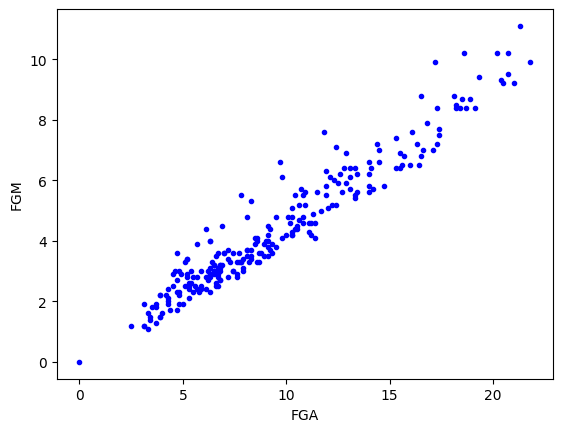

In [ ]:
import matplotlib.pyplot as plt #파이썬에서 데이터를 그려볼 때 사용하는 라이브러리
plt.plot(X, Y, '.b') #X와 Y를 파란색으로 그려달라
plt.xlabel("FGA")
plt.ylabel("FGM")


#결과 : 선형적으로 증가하고 있는 데이터. 직선의 식을 세워서 데이터를 설명하는 인공지능 모델을 만들 수 있을 것.
#인공지능 모델 = 직선의 식(선형회귀 식)


#직선의 식을 세우고, 훈련을 시켜보자.
#훈련을 시키기 위해서는 목적함수를 잘 알아야한다.
#목적 함수를 최소화하는 세타를 찾는 것이 우리의 목적이다.


# 2단계 : ML model 훈련 (경사하강법 이용)

#### ML model의 훈련 목표 : 손실 함수의 값을 최소화하는 theta를 찾는 것.

# 10. 준비

In [ ]:
# 학습률(=얼마나 빨리 학습할건지) 설정, 몇 번 훈련 진행할 건지 설정. 세타, 세타의 그레디언트를 초기화해준다.

learning_rate = 0.0001

# 훈련 횟수 : epochs
n_iter = 200

# 11. 초기화

In [ ]:
# theta와 theta의 미분인 gradient를 초기화 --> 0으로 초기화
theta = np.zeros((2,1))
gradients = np.zeros((2,1))

# 12. 변수 설정

In [ ]:
# 변수로 x0 와 xb 이용
# 1로만 채워져있는 x0와 X를 결합해서 xb를 만들겠다.
#xb = (1, X)
x0 = np.ones((m,1))
xb = np.c_[x0, X]  #x0와 X를 열 방향으로 결합. (m,1)과 (m,1)을 열 방향으로 결합하여 (m,2)가 됨.

print(xb.shape)

# 13. 훈련

In [ ]:
# 1) xb * theta를 해준다. xb.dot(theta)  (249, 2) * (2, 1) = (249, 1)
# 2) xb * theta - Y를 해준다. xb.dot(theta) - Y --> (249, 1) - (249, 1) = (249, 1)
# 3) (xb * theta - Y)*xb를 해준다.(249, 1) * (249, 2) 계산 못함.
# xb를 transpose 해줌 (2, 249) * (249, 1)
for i in range(n_iter):
  gradients = (1.0/m) * xb.T.dot(xb.dot(theta) - Y)
  theta = theta - learning_rate * gradients

NameError: name 'n_iter' is not defined

In [ ]:
#결과
print(theta)

[[0.03517548]
 [0.41092642]]


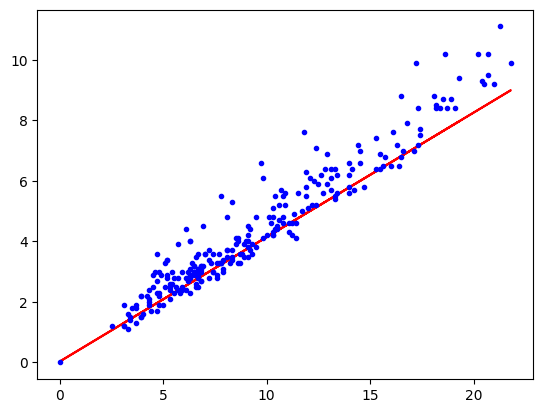

In [ ]:
# 14. 결과 가시화
#(X,Y)의 데이터와 Y = theta_0 + X*theta_1을 그려봄.

Y_pred = xb.dot(theta)
plt.plot(X, Y_pred, color = 'Red')
plt.plot(X, Y, '.b')